Importing Required libraries....


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [3]:
from google.colab import files
uploaded = files.upload()

Saving NLP_Project.txt to NLP_Project.txt


Load and pre-process the data


In [10]:
file = open("NLP_Project.txt", "r", encoding="utf8")
#Store file in list
lines =[]
for i in file:
    lines.append(i)

#Convert list to string
data = ""
for i in lines:
  data = ' '.join(lines)
#replace unnecesasary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('"','').replace('"', '').replace('**', '').replace('*', '' ) #

#remove Unnecessary spaces
data = data.split()
data = ''.join(data)
data[:500]

'TheProjectGutenbergEBookofMetamorphosis,byFranzKafkaTranslatedbyDavidWyllie.ThiseBookisfortheuseofanyoneanywhereatnocostandwithalmostnorestrictionswhatsoever.Youmaycopyit,giveitawayorre-useitunderthetermsoftheProjectGutenbergLicenseincludedwiththiseBookoronlineatwww.gutenberg.orgThisisaCOPYRIGHTEDProjectGutenbergeBook,DetailsBelowPleasefollowthecopyrightguidelinesinthisfile.Title:MetamorphosisAuthor:FranzKafkaTranslator:DavidWyllieReleaseDate:August16,2005[EBook#5200]Firstposted:May13,2002Lastup'

In [12]:
#Length of the data
len(data)

112543

Apply Tokenization

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]



[105, 48, 49, 50, 51, 52, 15, 106, 107, 108, 109, 110, 111, 112, 113]

In [14]:
len(sequence_data)

2930

In [15]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

2608

In [16]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print(" The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

 The Length of sequences are:  2927


array([[105,  48,  49,  50],
       [ 48,  49,  50,  51],
       [ 49,  50,  51,  52],
       [ 50,  51,  52,  15],
       [ 51,  52,  15, 106],
       [ 52,  15, 106, 107],
       [ 15, 106, 107, 108],
       [106, 107, 108, 109],
       [107, 108, 109, 110],
       [108, 109, 110, 111]])

In [17]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)

In [18]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[105  48  49]
 [ 48  49  50]
 [ 49  50  51]
 [ 50  51  52]
 [ 51  52  15]
 [ 52  15 106]
 [ 15 106 107]
 [106 107 108]
 [107 108 109]
 [108 109 110]]
Response:  [ 50  51  52  15 106 107 108 109 110 111]


In [19]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
#from sklearn.model_selection import train_test_split

# assume that your data is stored in two lists: X (input data) and y (output/target data)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Define the model architecture
model = Sequential()
model.add(Embedding(vocab_size, output_dim=10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(units=vocab_size, activation='softmax'))



In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             26080     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 2608)              2610608   
                                                                 
Total params: 15,685,688
Trainable params: 15,685,688
Non-trainable params: 0
_________________________________________________________________


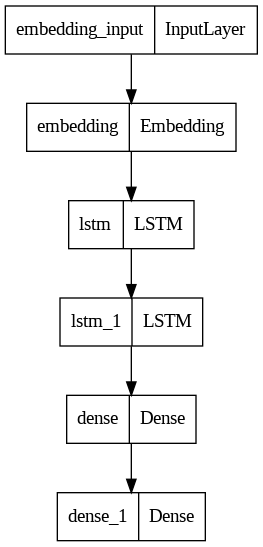

In [25]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
46/46 [==============================] - ETA: 0s - loss: 0.2679
Epoch 1: loss improved from inf to 0.26788, saving model to next_words.h5
46/46 [==============================] - 8s 76ms/step - loss: 0.2679
Epoch 2/70
46/46 [==============================] - ETA: 0s - loss: 0.1221
Epoch 2: loss improved from 0.26788 to 0.12206, saving model to next_words.h5
46/46 [==============================] - 1s 32ms/step - loss: 0.1221
Epoch 3/70
46/46 [==============================] - ETA: 0s - loss: 0.1115
Epoch 3: loss improved from 0.12206 to 0.11146, saving model to next_words.h5
46/46 [==============================] - 1s 29ms/step - loss: 0.1115
Epoch 4/70
46/46 [==============================] - ETA: 0s - loss: 0.1379
Epoch 4: loss did not improve from 0.11146
46/46 [==============================] - 1s 23ms/step - loss: 0.1379
Epoch 5/70
45/46 [============================>.] - ETA: 0s - loss: 0.2746
Epoch 5: loss did not improve from 0.11146
46/46 [==========================

In [31]:
# Test the model
loss = model.evaluate(X, y, batch_size=64)
print(f"Test loss: {loss}")

46/46 [==============================] - 0s 8ms/step - loss: 0.0033
Test loss: 0.003308079903945327


In [32]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [33]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: The Project Gutenberg
['The', 'Project', 'Gutenberg']
1/1 [==============================] - 1s 657ms/step
1
Enter your line: This eBook is
['This', 'eBook', 'is']
1/1 [==============================] - 1s 639ms/step
gregor'ssisterwouldleaveherworktohelphermother
Enter your line: 0
Execution completed.....
